In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential

import pathlib
from pathlib import Path

E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\pyth

In [2]:

model_name = "CNN_16_96_128_epochs_5_relu_RMSprop_categorical_crossentropy_padding_same"
model_folder_name = "Optimization Results"
model_path = Path(model_folder_name) / model_name
model_1 = keras.models.load_model(model_path)

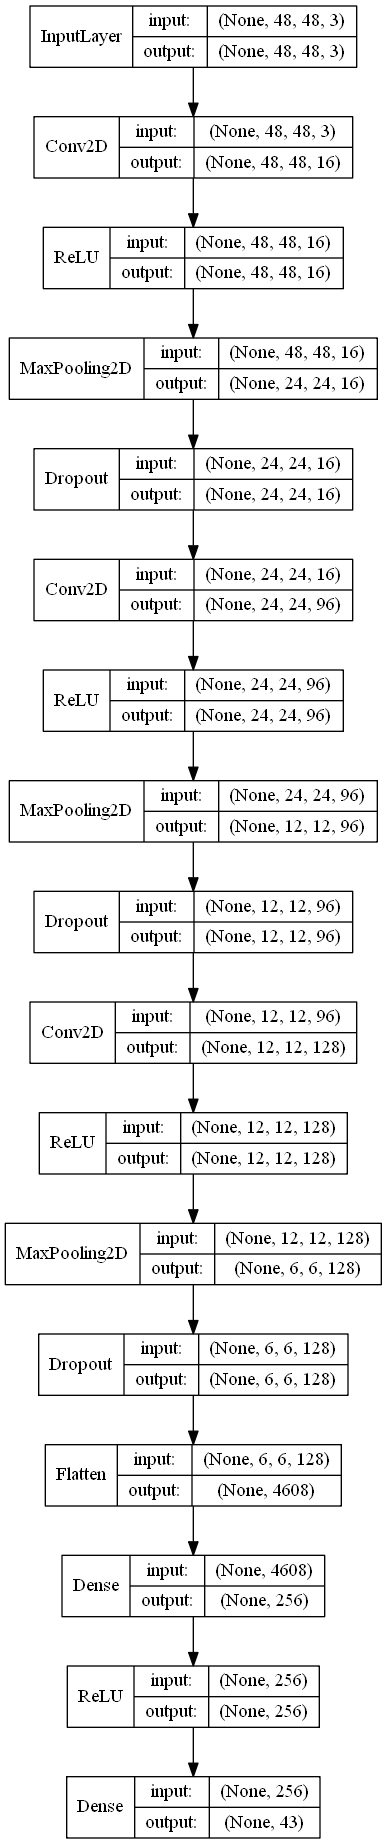

In [3]:
keras.utils.plot_model(model_1,to_file="model.png",show_shapes=True,show_layer_names=False,rankdir="TB",expand_nested=False,dpi=96)


In [13]:
import cv2

# convert image to ppm format

#rootpath = 'Own_test_images/class26.jpeg'
#newpath = 'Own_test_images/class26.ppm'
#im = Image.open(rootpath)
#im.save(newpath)

#can only use ppm format 
rootpath = 'Training/00000/00000_00000.ppm'
IMG_SIZE = 48
custom_data = cv2.resize(plt.imread(rootpath), (IMG_SIZE,IMG_SIZE))
custom_data = np.reshape(custom_data/255, (1,48,48,3))

InvalidArgumentError: input_7:0 is both fed and fetched.

In [112]:
X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')

In [53]:

class_features = []
class_labels = []
for i in range(0,43):
    class_features.append([])
    class_labels.append([])
    


for i, label in enumerate(y_test):

    class_labels[int(np.argmax(label))].append(label)
    class_features[int(np.argmax(label))].append(X_test[i])
    


In [55]:
results = []
for i, c in enumerate(class_features):
    
    c = np.reshape(c, (-1, c[0].shape[0], c[0].shape[0], 3))
    
    score = model_1.evaluate(c, np.array(class_labels[i]), verbose = 0)
    #print('Class: ', i)
    #print('Test loss:', score[0]) 
    #print('Test accuracy:', score[1])
    results.append(score[1])
    

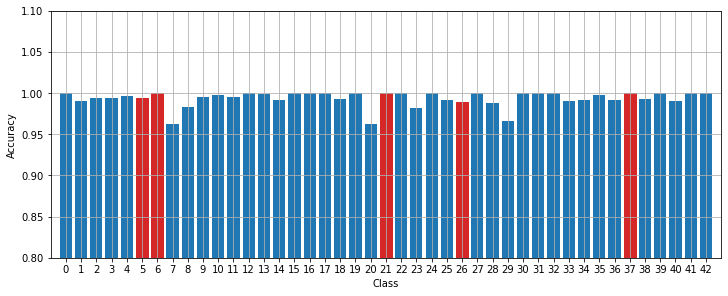

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43),results, width)
barlist[5].set_color('tab:red')
barlist[6].set_color('tab:red')
barlist[21].set_color('tab:red')
barlist[26].set_color('tab:red')
barlist[37].set_color('tab:red')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.1,ymin=0.8)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Accuracy')

plt.savefig('Class_accuracy.png', dpi=500)


In [56]:
#Wiederholung acc per class to test
pred_classes=np.argmax(model_1.predict(X_test), axis=1)

act_classes = np.argmax(y_test, axis=1)

hits = np.zeros(43)
trys = np.zeros(43)
for j in range(0,int(pred_classes.size)):
    trys[act_classes[j]]+=1
    if pred_classes[j]==act_classes[j]:
        hits[act_classes[j]]+=1
        
    
result2 = hits / trys 

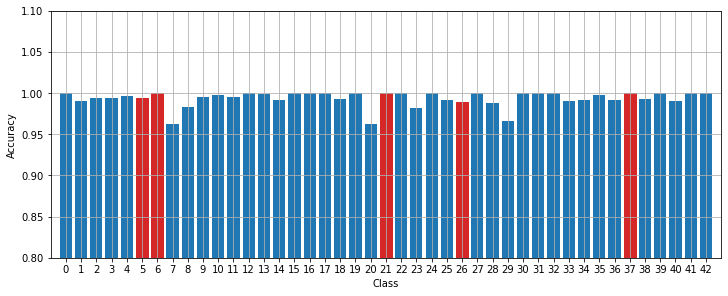

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43),result2, width)
barlist[5].set_color('tab:red')
barlist[6].set_color('tab:red')
barlist[21].set_color('tab:red')
barlist[26].set_color('tab:red')
barlist[37].set_color('tab:red')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.1,ymin=0.8)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Accuracy')

plt.savefig('Class_accuracy2.png', dpi=500)

In [64]:
#Searching for false posetives (from total false posetives amount)
pred_classes=np.argmax(model_1.predict(X_test), axis=1)

act_classes = np.argmax(y_test, axis=1)

hits = np.zeros(43)
false_pos_number = 0
for j in range(0,int(pred_classes.size)):
    
    if pred_classes[j]!=act_classes[j]:
        false_pos_number+=1
        hits[pred_classes[j]]+=1
        
        
    
result_false_pos_1 = hits / false_pos_number 

0.06172839506172839


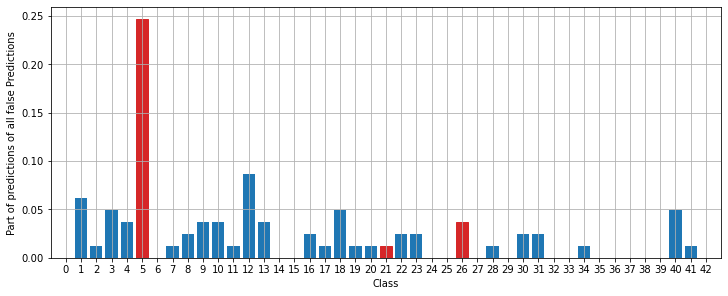

In [113]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43),result_false_pos_1, width)
barlist[5].set_color('tab:red')
barlist[6].set_color('tab:red')
barlist[21].set_color('tab:red')
barlist[26].set_color('tab:red')
barlist[37].set_color('tab:red')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.1,ymin=-0.1)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Part of predictions of all false Predictions')

plt.savefig('False_pos_1.png', dpi=500)

In [68]:
#Searching for false posetives (wrong of predictions into this class)
pred_classes=np.argmax(model_1.predict(X_test), axis=1)

act_classes = np.argmax(y_test, axis=1)

hits = np.zeros(43)
trys = np.zeros(43)
for j in range(0,int(pred_classes.size)):
    
    
    trys[pred_classes[j]]+=1
    if pred_classes[j]!=act_classes[j]:
        
        hits[pred_classes[j]]+=1
        
        
    
result_false_pos_2 = hits / trys 

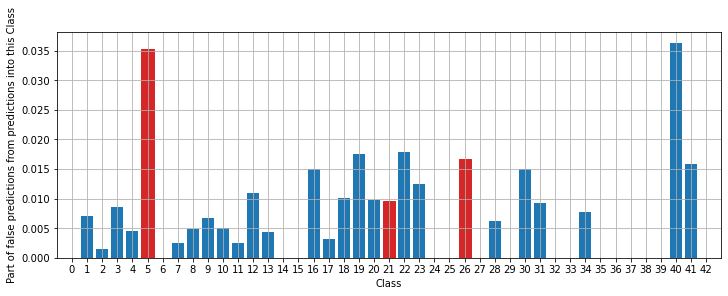

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43),result_false_pos_2, width)
barlist[5].set_color('tab:red')
barlist[6].set_color('tab:red')
barlist[21].set_color('tab:red')
barlist[26].set_color('tab:red')
barlist[37].set_color('tab:red')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.1,ymin=-0.1)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Part of false predictions from predictions into this Class')

plt.savefig('False_pos_2.png', dpi=500)

In [147]:
#Generate 'random' numbers to corupt Data
import random
random.seed(a=50)

act_classes = np.argmax(y_test, axis=1)

corupt_X_test=np.zeros(X_test.shape)
corupt_X_test[:]=X_test

r_numbers=np.zeros(act_classes.size)
r_positions=np.zeros((act_classes.size,2))

for i in range(0,act_classes.size):
    r_numbers[i]=random.random()
    r_positions[i,0]=random.randint(0, 47)
    r_positions[i,1]=random.randint(0, 47)

r_positions=r_positions.astype(int)
print(r_numbers.shape)
print(r_numbers[:].shape)
print(type(r_positions))

(11923,)
(11923,)
<class 'numpy.ndarray'>


11923


In [143]:
#Corrupt Data function


def Corrupt_Data (old_Data ,r_numbers, r_positions, p):
    Data=np.copy(old_Data)
    x=0
    for i in range(0,r_numbers.shape[0]):
        if r_numbers[i]<=p:
            Data[i,r_positions[i,0],r_positions[i,1],0]=0
            Data[i,r_positions[i,0],r_positions[i,1],1]=0
            Data[i,r_positions[i,0],r_positions[i,1],2]=0
            if x==0:
                x=1
                plt.imshow(Data[i,:])

    
    return[Data]


In [139]:
def Corruption_Test (r_numbers,p):
    j=0
    k=0
    for i in range(0,r_numbers.shape[0]):
        j+=1
        if r_numbers[i]<=p:
            k+=1
        
    
    return[k/j]

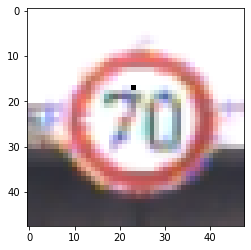

In [149]:
# acc per class with 100% coruption
pred_classes=np.argmax(model_1.predict(Corrupt_Data(X_test,r_numbers,r_positions,1)), axis=1)

act_classes = np.argmax(y_test, axis=1)

hits = np.zeros(43)
trys = np.zeros(43)
for j in range(0,int(pred_classes.size)):
    trys[act_classes[j]]+=1
    if pred_classes[j]==act_classes[j]:
        hits[act_classes[j]]+=1
        
    
result_corrupt_class = hits / trys 

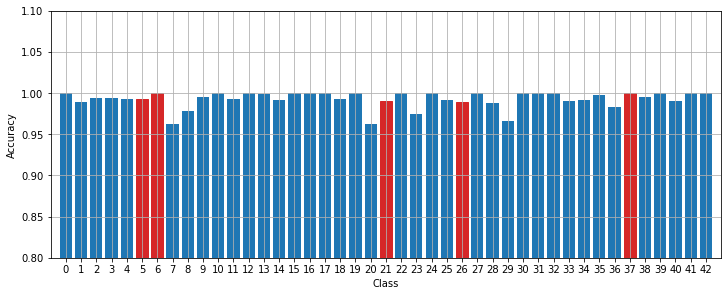

In [150]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,43),result_corrupt_class, width)
barlist[5].set_color('tab:red')
barlist[6].set_color('tab:red')
barlist[21].set_color('tab:red')
barlist[26].set_color('tab:red')
barlist[37].set_color('tab:red')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.1,ymin=0.8)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Class')
axs.set_ylabel('Accuracy')

plt.savefig('Class_accuracy_currupt.png', dpi=500)

Prediction for 0.0 abgeschlossen
[0.0]
Prediction for 0.05 abgeschlossen
[0.04931644720288518]
Prediction for 0.1 abgeschlossen
[0.09921999496770947]
Prediction for 0.15000000000000002 abgeschlossen
[0.14853644217059464]
Prediction for 0.2 abgeschlossen
[0.20280130839553803]
Prediction for 0.25 abgeschlossen
[0.25178226956302946]
Prediction for 0.30000000000000004 abgeschlossen
[0.3018535603455506]
Prediction for 0.35000000000000003 abgeschlossen
[0.351589365092678]
Prediction for 0.4 abgeschlossen
[0.40476390170259163]
Prediction for 0.45 abgeschlossen
[0.4526545332550533]
Prediction for 0.5 abgeschlossen
[0.5046548687410887]
Prediction for 0.55 abgeschlossen
[0.5552293885767005]
Prediction for 0.6000000000000001 abgeschlossen
[0.6083200536777656]
Prediction for 0.65 abgeschlossen
[0.6563784282479241]
Prediction for 0.7000000000000001 abgeschlossen
[0.7072884341189298]
Prediction for 0.75 abgeschlossen
[0.7527467919147866]
Prediction for 0.8 abgeschlossen
[0.799295479325673]
Predictio

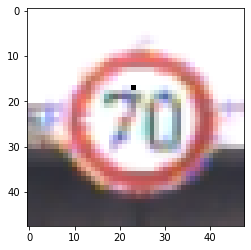

In [151]:
#acc to coruption level
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(21)
trys = np.zeros(21)


for i in range (0,21):
    pred_classes=np.argmax(model_1.predict(Corrupt_Data(X_test,r_numbers,r_positions,i*0.05)), axis=1)
    print("Prediction for " + str(i*0.05) + " abgeschlossen")
    print("Actual Corruption: " + str(Corruption_Test(r_numbers,i*0.05)))
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
result_corrupt_acc = hits / trys 



[0.99320641 0.99320641 0.99303866 0.99295479 0.99287092 0.99287092
 0.99287092 0.99278705 0.99278705 0.99278705 0.99278705 0.99270318
 0.99261931 0.99253544 0.99245156 0.99245156 0.99236769 0.99245156
 0.99253544 0.99253544 0.99245156]


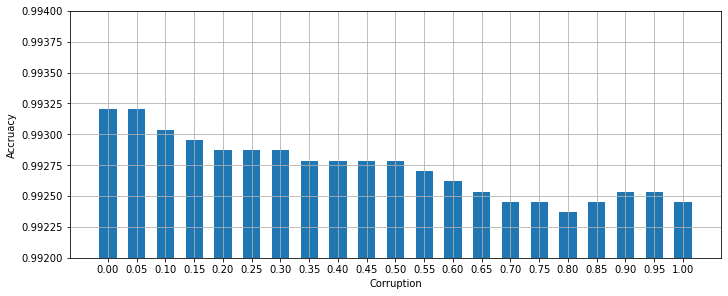

In [152]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.03  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,21)*0.05,result_corrupt_acc, width)


axs.set_xticks(np.arange(0,21)*0.05)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=0.994,ymin=0.992)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Corruption')
axs.set_ylabel('Accruacy')

plt.savefig('Coruption_acc.png', dpi=500)
print(result_corrupt_acc)

In [ ]:
# predict class of certain example
import cv2

# convert image to ppm format

#rootpath = 'Own_test_images/class26.jpeg'
#newpath = 'Own_test_images/class26.ppm'
#im = Image.open(rootpath)
#im.save(newpath)

#can only use ppm format 
rootpath = 'Own_test_images/class13.ppm'
IMG_SIZE = 48
custom_data = cv2.resize(plt.imread(rootpath), (IMG_SIZE,IMG_SIZE))/255

In [ ]:
classes = np.reshape(model_1.predict(np.reshape(custom_data,(1,48,48,3))), (43,))#(y.shape[1],))
print('Predicted class:', np.argmax(classes))


In [ ]:
#data = np.load('class1_test_features_32.npy')/255
#data = np.load('test_data.npy')/255
data = np.load('custom_data.npy')/255
data = np.reshape(data, (1,48,48,3))

#data = np.reshape(data, (data.shape[0],32,32,3))
sum_ = 0
idx = 0
for img in data:
    
    classes = np.reshape(model_1.predict(np.reshape(img,(1,48,48,3))), (43,))#(y.shape[1],))
    print('Predicted class:', np.argmax(classes))
    print('Imagenumber:', idx)
    idx += 1
    if np.argmax(classes) == 0:
        sum_ += 1
accuracy = sum_/data.shape[0]
print(accuracy)